In [1]:
import sys; sys.path.insert(0, "../"); from utils import *
from models import VAE, vae_loss, AutoEncoder, ae_loss
from tqdm import trange

%matplotlib inline
import matplotlib.pyplot as plt

You can use npar for np.array


In [2]:
X = torch.rand(100, 2)

In [3]:
ae = AutoEncoder()

In [4]:
opt = torch.optim.Adam(ae.parameters(), lr=1e-3)

100%|██████████| 10000/10000 [00:05<00:00, 1999.50it/s]


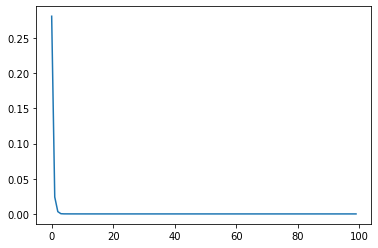

In [5]:
hist = []
for i in trange(10000):
    opt.zero_grad()
    
#     recon_X = ae(X)
#     loss = ae_loss(recon_X, X, include_l1=ae.l1_strength)
    
    loss = ae.compute_loss(X)
    
    loss.backward()
    opt.step()
    if i%100==0: hist.append(loss.item())
plt.plot(hist)

In [6]:
ae.eval()
recon_X = ae(X)

In [7]:
# vae_loss(recon_X, X, mu, log_var)
F.mse_loss(recon_X, X)

tensor(9.0751e-08, grad_fn=<MseLossBackward>)

In [8]:
ae.l1_strength

Parameter containing:
tensor([6.1564e-06], requires_grad=True)